# **Heart Disease Prediction using Machine Learning**  

## 🏥 **Introduction**  
Heart disease is one of the leading causes of death worldwide, accounting for 31% of all global deaths. Early detection is crucial for timely medical intervention. In this project, we apply machine learning techniques to predict the likelihood of heart disease based on medical attributes.  

### **🎯 Objective:**  
- Utilize machine learning models to predict heart disease.  
- Identify key health indicators contributing to heart disease risk.  
- Compare model performance and determine the best predictive approach.  

---

## 📥 **Data Import & Setup**  
The first step involves importing the necessary libraries and loading the dataset. This is crucial for preparing the data for analysis and modeling. The dataset will be used to train and evaluate machine learning models for heart disease prediction.

- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
- **Dataset:** Heart disease prediction data from Kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Pandas: to perform data manipulation and anlysis
import pandas as pd
#Numpy : to handle numerical operations and handling arrays
import numpy as np
#Seaborn and Matplotlib: for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC #Import Support Vector Machine
from sklearn.model_selection import train_test_split, KFold # Import train_test_split function, K-fold
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay #Import metrics for accuracy score

In [4]:
# Read the dataset from the specified excel file and store it in the 'df' variable
file_path = '/content/drive/MyDrive/HeartDiseasePrediction/HeartDisease.csv'
df = pd.read_csv(file_path)

In [5]:
#View the Dataframe
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
#Overview of the DataFrame's structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#Convert data types
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    Int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    Int64  
 4   Cholesterol     918 non-null    Int64  
 5   FastingBS       918 non-null    Int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    Int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    Float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    Int64  
dtypes: Float64(1), Int64(6), string(5)
memory usage: 92.5 KB


In [8]:
#Statistical summaries of numerical data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.06657,0.497414
min,28.0,0.0,0.0,0.0,60.0,-2.6,0.0
25%,47.0,120.0,173.25,0.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
max,77.0,200.0,603.0,1.0,202.0,6.2,1.0


## 🧹 **Data Cleaning**  
The dataset is cleaned by handling missing values, converting categorical variables to numerical formats, and standardizing the features. These steps are essential to ensure the quality of the data before feeding it into machine learning models.

- **Missing Values:** Checked for and handled appropriately.
- **Categorical to Numerical:** Categorical variables are encoded.
- **Standardization:** Scaling the numerical features for better model performance.


In [9]:
#Identifying missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [10]:
#Drop duplicate values
df.drop_duplicates(inplace=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


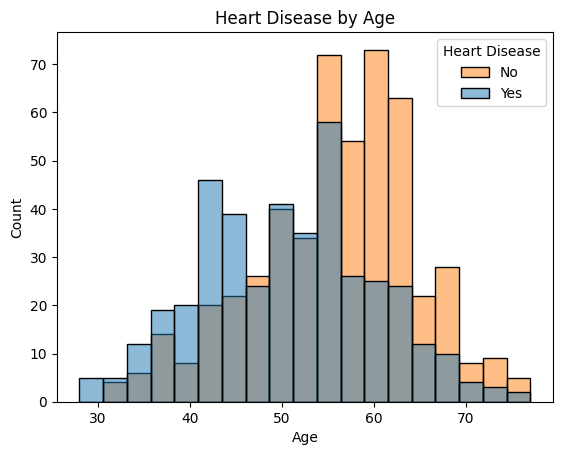

In [11]:
#Countplot of Heart Disease by Age
sns.histplot(x='Age', hue='HeartDisease', data=df)
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

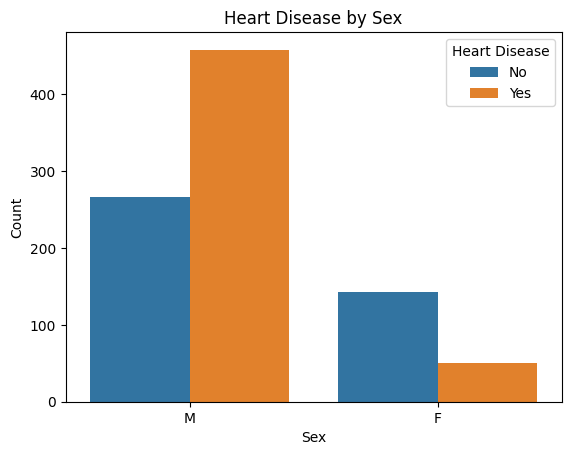

In [12]:
#Countplot of Heart Disease by Sex
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

## Handling Categorial Values

1.   pd.get_dummies(): This function is used to create dummy (indicator) variables for categorical columns in a DataFrame. Dummy variables are binary columns that represent the presence or absence of each category.
2.   For example: one-hot encoding for the Sex variable, creating two binary columns: Sex_F (female) and Sex_M (male), where "True" indicates the presence of that category and "False" indicates its absence for each row in the DataFrame.

In [13]:
#Convert categorical variables into numerical format using onehotencoding
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [14]:
#Seperating features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
print(X.shape)
print(y.shape)

(918, 20)
(918,)


In [15]:
#Show X(Features)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [16]:
#Show y(target varaible)
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


## 🏗️ **Model Training**  
Various machine learning models are trained to predict heart disease. The models selected for this project are Naïve Bayes, Decision Tree, SVM, and Gradient Boosting. These models are commonly used for classification tasks and offer a variety of strengths.

- **Models Used:** Naïve Bayes, Decision Tree, SVM, and Gradient Boosting.
- **Purpose:** Compare and evaluate the performance of each model to determine the most effective one.


## Model 1 Evaluation - *Decision Tree*
*Concept Used : Goodness of Split using Gini index and Entropy, Confusion Matrix*

Justification :
1.  Decision Tree can help visualize the factors leading to a heart disease
diagnosis.
2.   For instance, it might show that if a patient is over 50, has high cholesterol and is a smoker, they have a higher likelihood of heart disease. This interpretability is useful for healthcare professionals in explaining risk factors to patients.



**Checking Goodness of Split in Decision Tree using Gini index**

In [17]:
#Split dataset into random training and test data set
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X, y, test_size=0.3, random_state=625)
print(X_dt_train.shape)
print(X_dt_test.shape)
print(y_dt_train.shape)
print(y_dt_test.shape)

(642, 20)
(276, 20)
(642,)
(276,)


In [18]:
#Create Decision Tree classifier object - criterion = 'gini'
clf_dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [19]:
#Train the model using training set
dt_gini = clf_dt_gini.fit(X_dt_train, y_dt_train)

In [20]:
#Check accuracy score for model
y_dtg_pred = clf_dt_gini.predict(X_dt_test)
print("Decision Tree Model Accuracy using Gini index:", accuracy_score(y_dt_test, y_dtg_pred))

Decision Tree Model Accuracy using Gini index: 0.8478260869565217


In [21]:
#Check accuracy score for testing set
y_dtg_pred_train = clf_dt_gini.predict(X_dt_train)
print("Decision Tree Training Set Accuracy using Gini index:", accuracy_score(y_dt_train, y_dtg_pred_train))

Decision Tree Training Set Accuracy using Gini index: 0.9112149532710281


**Performance Metrics: Precision, Recall, and F1 Score**

In [22]:
#Precision, Recall, F1score
#average='macro' :  Calculate precision for each class and take the average (treating all classes equally).
print("Precision:", metrics.precision_score(y_dt_test, y_dtg_pred,average='macro'))
print("Recall:", metrics.recall_score(y_dt_test, y_dtg_pred,average='macro'))
print("F1score:", metrics.f1_score(y_dt_test, y_dtg_pred,average='macro'))

Precision: 0.8465063649222064
Recall: 0.8343980343980344
F1score: 0.8391786903440621


In [23]:
#Classification Report - Precision, Recall, F1-score
print("Classification Report for Decision Tree : "'\n',classification_report(y_dt_test, y_dtg_pred))

Classification Report for Decision Tree : 
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       111
         1.0       0.85      0.90      0.88       165

    accuracy                           0.85       276
   macro avg       0.85      0.83      0.84       276
weighted avg       0.85      0.85      0.85       276



**Checking Goodness of Split in Decision Tree using Entropy**

In [24]:
#Create Decision Tree classifier object - criterion = 'entropy'
clf_dt_ent = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [25]:
#Train the model using training set
dt_ent = clf_dt_ent.fit(X_dt_train, y_dt_train)

In [26]:
#Check accuracy score for model
y_dte_pred = clf_dt_ent.predict(X_dt_test)
dt_acc = accuracy_score(y_dt_test, y_dte_pred)
print("Decision Tree Model Accuracy using Entropy:", dt_acc)

Decision Tree Model Accuracy using Entropy: 0.8115942028985508


In [27]:
#Check accuracy score for training set
y_dte_pred_train = clf_dt_ent.predict(X_dt_train)
print("Decision Tree Training set Accuracy using Entropy:", accuracy_score(y_dt_train, y_dte_pred_train))

Decision Tree Training set Accuracy using Entropy: 0.9065420560747663


**Performance Metrics: Precision, Recall, and F1 Score**

In [28]:
#Precision, Recall, F1score
#average='macro' :  Calculate precision for each class and take the average (treating all classes equally).
print("Precision:", metrics.precision_score(y_dt_test, y_dte_pred,average='macro'))
print("Recall:", metrics.recall_score(y_dt_test, y_dte_pred,average='macro'))
print("F1score:", metrics.f1_score(y_dt_test, y_dte_pred,average='macro'))

Precision: 0.8038438568869102
Recall: 0.8055692055692055
F1score: 0.8046602787456446


In [29]:
#Classification Report - Precision, Recall, F1-score
print("Classification Report for Decision Tree : "'\n',classification_report(y_dt_test, y_dte_pred))

Classification Report for Decision Tree : 
               precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       111
         1.0       0.85      0.84      0.84       165

    accuracy                           0.81       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.81      0.81       276



**Confusion Matrix for Decision Tree using Gini index**

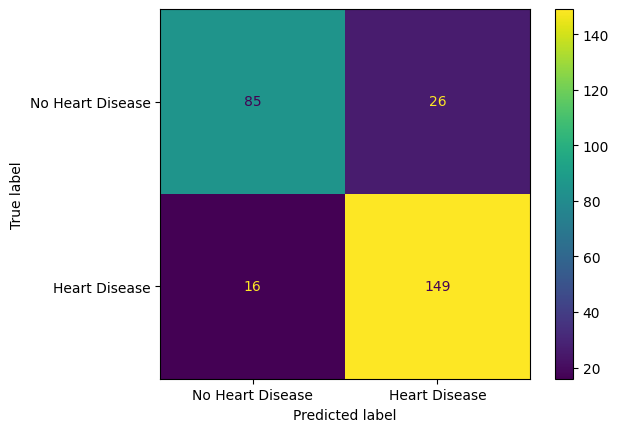

In [30]:
predictions_dt = y_dtg_pred
cm_dtg = confusion_matrix(y_dt_test, predictions_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtg, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()
plt.show()


**Confusion Matrix for Decision Tree using Entropy**

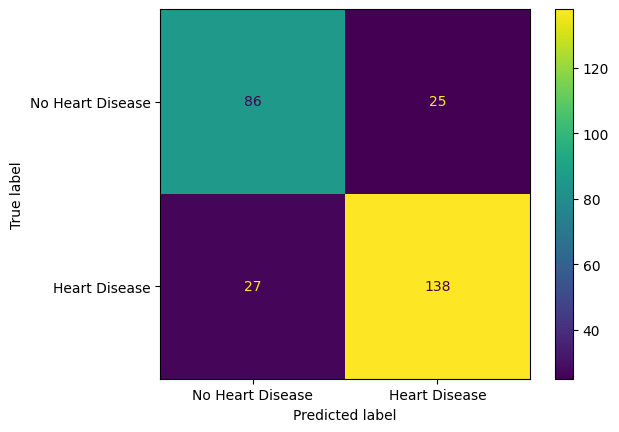

In [31]:
predictions_dt = y_dte_pred
cm_dt = confusion_matrix(y_dt_test, predictions_dt, labels=clf_dt_ent.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()
plt.show()

## Model 2 Evaluation - *Naive Bayes*
*Concept Used : K-Fold Cross Validation, Confusion Matrix*

Justification:
1.   Naive Bayes is quick and effective for classification tasks, especially with categorical data (like Sex and ChestPainType).
2.   For example: For a patient with a certain ChestPainType and Sex, Naive Bayes can quickly estimate the likelihood of having heart disease based on these features. If males with certain chest pain types are more likely to have heart disease, this algorithm will reflect that in its predictions.

In [32]:
#Split dataset into random training and test data set
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X, y, test_size=0.3, random_state=625)
print(X_dt_train.shape)
print(X_dt_test.shape)
print(y_dt_train.shape)
print(y_dt_test.shape)

(642, 20)
(276, 20)
(642,)
(276,)


In [33]:
#Create classifier for GaussianNB()
clf_nb = GaussianNB()

In [34]:
#Train the model using training set
clf_nb.fit(X_nb_train, y_nb_train)

GaussianNB()

In [35]:
#Check accuracy score for model
y_nb_pred = clf_nb.predict(X_nb_test)

In [36]:
#Check accuracy score for model
y_nb_pred = clf_nb.predict(X_nb_test)
print("Naive Bayes Model Accuracy without K-Fold :", accuracy_score(y_nb_test, y_nb_pred))

Naive Bayes Model Accuracy without K-Fold : 0.8514492753623188


**Performance Metrics: Precision, Recall, and F1 Score**

In [37]:
#Precision, Recall, F1score
#average='macro' :  Calculate precision for each class and take the average (treating all classes equally).
print("Precision:", metrics.precision_score(y_nb_test, y_nb_pred,average='macro'))
print("Recall:", metrics.recall_score(y_nb_test, y_nb_pred,average='macro'))
print("F1score:", metrics.f1_score(y_nb_test, y_nb_pred,average='macro'))

Precision: 0.8445076163913323
Recall: 0.8506961506961507
F1score: 0.8470128570849162


In [38]:
#Classification Report - Precision, Recall, F1-score
print("Classification Report for Naive Bayes : "'\n',classification_report(y_nb_test, y_nb_pred))

Classification Report for Naive Bayes : 
               precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       111
         1.0       0.89      0.85      0.87       165

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



**Confusion Matrix for Naive Bayes**

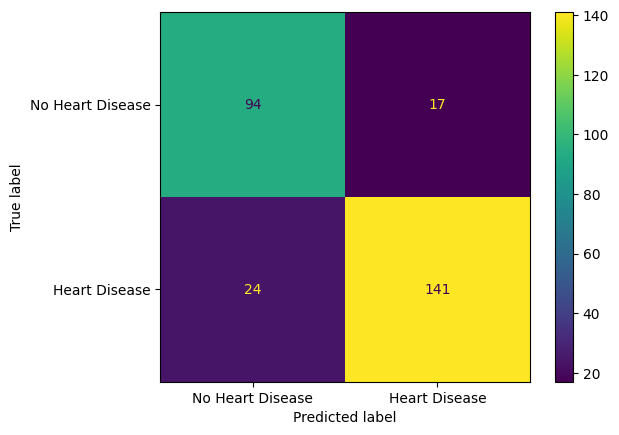

In [39]:
predictions_nb = y_nb_pred
cm_nb = confusion_matrix(y_nb_test, predictions_nb, labels=clf_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()
plt.show()

*K-Fold Cross Validation*

In [40]:
# Create copies of the original training data
X_nb = X.copy()
y_nb = y.copy()

In [41]:
#Use kfold with 5 split
kfold = KFold(n_splits=5, random_state=625, shuffle=True)

In [42]:
#Split the training data , train, test : indices of training and testing set respectively.
accuracies = []
#iterates over the indices provided by the kfold.split() method. 'train' contains the indices for the training set; 'test' contains the indices for the testing set.
for train, test in kfold.split(X_nb):
    # Use the copies to select data for each fold.
    #X_nb.iloc[train] selects the rows of X_nb corresponding to the training indices, while X_nb.iloc[test] selects the rows for the testing set.
    X_nb_train_fold, X_nb_test_fold = X_nb.iloc[train], X_nb.iloc[test]
    y_nb_train_fold, y_nb_test_fold = y_nb.iloc[train], y_nb.iloc[test]

print(X_nb_train_fold.shape)
print(X_nb_test_fold.shape)
print(y_nb_train_fold.shape)
print(y_nb_test_fold.shape)

(735, 20)
(183, 20)
(735,)
(183,)


In [43]:
#Create classifier for GaussianNB()
clf_nbk = GaussianNB()

In [44]:
#Train the model using training set
clf_nbk.fit(X_nb_train_fold, y_nb_train_fold)

GaussianNB()

In [45]:
#Check accuracy score for model
y_nbk_pred = clf_nbk.predict(X_nb_test_fold)
accuracy = (accuracy_score(y_nb_test_fold, y_nbk_pred)) #accuracy of the current fold
accuracies.append(accuracy) #Appending all accuracies

# Calculate average accuracy using np.mean()
nb_acc = np.mean(accuracies)
print("Average Naive Bayes Model Accuracy using K-Fold=5:",nb_acc)

Average Naive Bayes Model Accuracy using K-Fold=5: 0.8688524590163934


In [46]:
# Check accuracy score for the training set
train_accuracies = []
y_nbk_train = clf_nbk.predict(X_nb_train_fold)  # Predict on the training fold
train_accuracy = accuracy_score(y_nb_train_fold, y_nbk_train)  # Calculate accuracy
train_accuracies.append(train_accuracy)  # Append training accuracy

# Calculate average training accuracy using np.mean()
nb_acc_train = np.mean(train_accuracies)
print("Naive Bayes Training Set Accuracy using K-Fold=5:", nb_acc_train)

Naive Bayes Training Set Accuracy using K-Fold=5: 0.8639455782312925


In [47]:
# Append predictions and true labels for this fold
test_predictions = []  # List to store predictions
test_labels = []       # List to store true labels

# Store predictions and true labels
test_predictions.append(y_nbk_pred)
test_labels.append(y_nb_test_fold)

# Convert to NumPy arrays for aggregation
test_predictions = np.concatenate(test_predictions)
test_labels = np.concatenate(test_labels)

#Calculate average accuracy across all folds
avg_accuracy = np.mean(accuracies)
print("Average Naive Bayes Model Accuracy using K-Fold=5:", avg_accuracy)

Average Naive Bayes Model Accuracy using K-Fold=5: 0.8688524590163934


**Performance Metrics: Precision, Recall, and F1 Score**

In [48]:
# Calculate precision, recall, and F1 score after all folds
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
f1 = f1_score(test_labels, test_predictions, average='macro')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8708037245773095
Recall: 0.8646385542168675
F1 Score: 0.866747572815534


In [49]:
#Classification Report - Precision, Recall, F1-score
print("Classification Report for Naive Bayes:\n", classification_report(test_labels, test_predictions))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.86      0.91      0.88       100

    accuracy                           0.87       183
   macro avg       0.87      0.86      0.87       183
weighted avg       0.87      0.87      0.87       183



**Confusion Matrix for Naive Bayes using K-Fold**

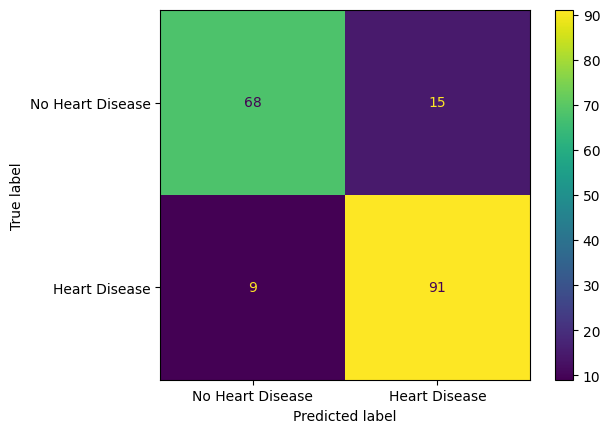

In [50]:
# Calculate the confusion matrix for all folds
cm_nbk = confusion_matrix(test_labels, test_predictions, labels=clf_nbk.classes_)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nbk, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()
plt.show()

## Model Evaluation 3 - *SVM*
*Concept Used : Confusion Matrix*

Justification:
1.   SVM is great for separating different classes, especially when the data isn’t linearly separable. It finds the best line (or hyperplane) that divides patients with heart disease from those without.
2.   For Example: If we plot RestingBP (blood pressure) against Cholesterol, SVM can help identify a boundary that separates patients likely to have heart disease from those who are not.



In [51]:
##Split dataset into random training and test data set
X_svc_train, X_svc_test, y_svc_train, y_svc_test = train_test_split(X, y, test_size=0.3, random_state=625)

In [52]:
#Create classifier for svc() - Kernel = linear
svc = SVC(kernel = 'linear')

In [53]:
#Train the model using training set
svc.fit(X_svc_train,y_svc_train)

SVC(kernel='linear')

In [54]:
#Check accuracy score for model
y_svc_pred = svc.predict(X_svc_test)
svc_acc = accuracy_score(y_svc_test, y_svc_pred)
print("SVM Model Accuracy using Kernel=linear :", svc_acc)

SVM Model Accuracy using Kernel=linear : 0.8840579710144928


In [55]:
#Check accuracy for training set
svc_train = svc.predict(X_svc_train)
print("SVM Training Set Accuracy using Kernel=linear :", accuracy_score(y_svc_train, svc_train))

SVM Training Set Accuracy using Kernel=linear : 0.8691588785046729


In [56]:
#Precision, Recall, F1score
#average='macro' :  Calculate precision for each class and take the average (treating all classes equally).
print("Precision:", metrics.precision_score(y_svc_test, y_svc_pred,average='macro'))
print("Recall:", metrics.recall_score(y_svc_test, y_svc_pred,average='macro'))
print("F1score:", metrics.f1_score(y_svc_test, y_svc_pred,average='macro'))

Precision: 0.8787664911232966
Recall: 0.8809172809172809
F1score: 0.8797909407665505


In [57]:
#Classification Report - Precision, Recall, F1-score
print("Classification Report for Decision Tree : "'\n',classification_report(y_svc_test, y_svc_pred))

Classification Report for Decision Tree : 
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       111
         1.0       0.91      0.90      0.90       165

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



**Confusion Matrix for SVM**

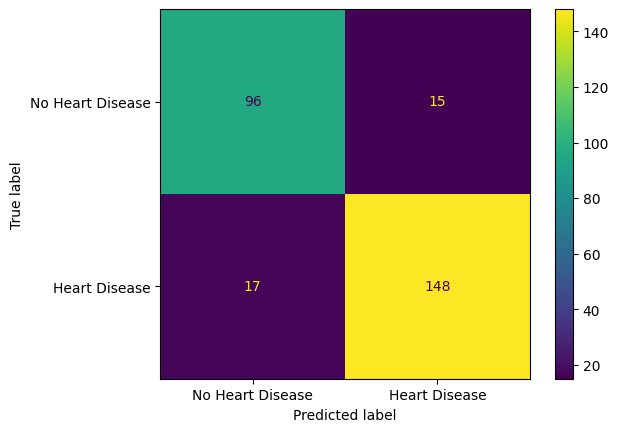

In [58]:
predictions_svc = y_svc_pred
cm_svc = confusion_matrix(y_svc_test, predictions_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot()
plt.show()

## *Accuracy Score Comparison of Algorithms*

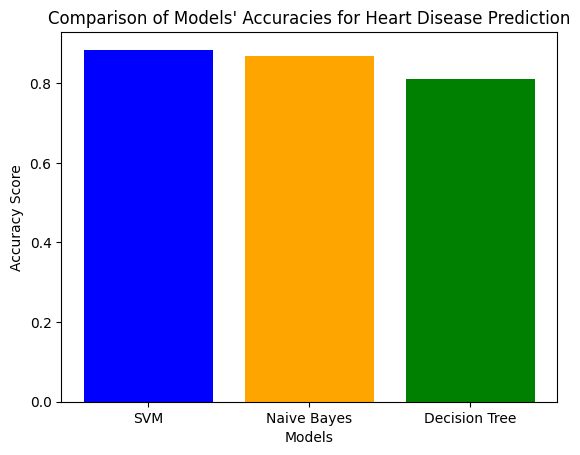

In [59]:
models = ['SVM', 'Naive Bayes', 'Decision Tree']
accuracy = [svc_acc, nb_acc, dt_acc]

plt.bar(models, accuracy, color=['blue', 'orange', 'green'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Models' Accuracies for Heart Disease Prediction")
plt.show()